데이터 시각화 양식

양식의 순서는 지키되 참고만 하고 자유롭게 더하거나 빼서 분석하세요.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import time
import json
import urllib
import requests
from bs4 import BeautifulSoup
import random
import time
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# !pip install matplotlib
# %matplotlib inline 
# %matplotlib notebook 

from numpy import sin, cos

from cycler import cycler
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
import platform

import matplotlib.font_manager as fm
fm.findSystemFonts(fontpaths=None, fontext='ttf')
plt.rc('font', family='NanumBarunGothic')

from glob import glob

import scipy.integrate as integrate
import matplotlib.animation as animation
from collections import deque

# # seaborn 예제 파일 불러오기
# penguins = sns.load_dataset('penguins')

In [ ]:
# del df

# df.completed_at = pd.to_datetime(df.completed_at, )
# df.marketing_start_at = pd.to_datetime(df.marketing_start_at, )



In [160]:
sns.set_theme(style='whitegrid') 
df = pd.read_csv('./data/facam_vi.csv')
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at
0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,미적용,0,110500,COMM,VBANK,개발자 커리어,2018-11-11 00:00:00
1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,미적용,0,116000,COMM,CARD,영상 편집,2020-12-02 00:00:00
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
3,970656,72297,204246,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,미적용,0,190900,COMM,CARD,프로그래밍,2021-03-04 00:00:00
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14 00:00:00


In [161]:
df.loc[(df['category_title'] == '데이터 사이언스'), 'category_title'] = '데이터사이언스'

In [162]:
df.completed_at = pd.to_datetime(df.completed_at, )
df.marketing_start_at = pd.to_datetime(df.marketing_start_at, )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      101102 non-null  int64         
 1   customer_id             101102 non-null  int64         
 2   course_id               101102 non-null  int64         
 3   type                    101102 non-null  object        
 4   state                   101102 non-null  object        
 5   course_title            101102 non-null  object        
 6   category_title          101102 non-null  object        
 7   format                  101102 non-null  object        
 8   completed_at            101102 non-null  datetime64[ns]
 9   transaction_amount      101102 non-null  int64         
 10  coupon_title            101102 non-null  object        
 11  coupon_discount_amount  101102 non-null  int64         
 12  sale_price              101102

> 17 columns, 101102 index, 1718734 rows, notnull data

In [163]:
df.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price
count,1.011020e+05,101102.000000,101102.000000,1.011020e+05,101102.000000,1.011020e+05
mean,1.145511e+06,415909.561997,208729.604815,1.286851e+05,14423.185199,1.592345e+05
std,1.125048e+05,206627.373238,21281.637839,1.299967e+05,35684.365000,1.147219e+05
min,5.679930e+05,16.000000,2516.000000,-1.800000e+06,0.000000,0.000000e+00
25%,1.047142e+06,228975.000000,203146.000000,8.900000e+04,0.000000,1.100000e+05
50%,1.133842e+06,500265.500000,203787.000000,1.190000e+05,0.000000,1.340000e+05
75%,1.238848e+06,565941.000000,204870.000000,1.584000e+05,10000.000000,1.710000e+05
max,1.381657e+06,670896.000000,300000.000000,1.800000e+06,674000.000000,1.800000e+06


# 매출 분석

## preprocessing refer
> 'type' column 의 'PAYMENT'(결제완료) 와 'REFUND'(환불)이 'state' column 에서 'COMPLETED' 인 값들의 합   

> 'completed_at' clone column 'completed_c' 을 추가. 'completed_c' dtype 으로 변경 후 연/월/일/시간으로 나눔

> df 에서 결제 승인이 처음 시작된 일시와 종료 일시 확인(마케팅시간도참고)

## df의 총 매출

In [164]:
# 'type'(구매상태), 'state'(진행상황), 'transaction_amount' column 추출
s = df.loc[:, ['type', 'state', 'transaction_amount']]
s.head()

,type,state,transaction_amount
0,ORDER,CANCELLED,90500
1,ORDER,CANCELLED,96000
2,PAYMENT,COMPLETED,171810
3,ORDER,CANCELLED,171810
4,PAYMENT,COMPLETED,97500


In [165]:
# 'type' column 의 'PAYMENT', 'REFUND' 와 'state' column 의 'COMPLEATED' 추출 
sales = s[(s['type'] == 'PAYMENT') + (s['type'] == 'REFUND') & (s['state'] == 'COMPLETED')]
sales.index = range(len(sales))
sales

,type,state,transaction_amount
0,PAYMENT,COMPLETED,171810
1,PAYMENT,COMPLETED,97500
2,PAYMENT,COMPLETED,96000
3,PAYMENT,COMPLETED,263000
4,PAYMENT,COMPLETED,91000
...,...,...,...
53035,PAYMENT,COMPLETED,212000
53036,PAYMENT,COMPLETED,149000
53037,PAYMENT,COMPLETED,159000
53038,PAYMENT,COMPLETED,96000


In [166]:
# 'transaction_amount' column 총합으로 총 매출 및 (추가할것)취소율 확인 'type' column 'REFUND' / 'PAYMENT' * 100
# len(s['type'] == 'REFUND') / len(s['type'] == 'PAYMENT') *100
sale = sales['transaction_amount'].sum() 
pay = len(sales[sales['type'] == 'PAYMENT']) 
re = len(sales[sales['type'] == 'REFUND'])
print(f'결제완료 {pay} 건 중 환불 {re} 건,\n총 매출액 : {sale} 원') 
# print("환불율' : %.3f%%" % (len(sales[sales['type'] == 'PAYMENT'])  / len(sales[sales['type'] == 'REFUND']) * 100))

결제완료 49415 건 중 환불 3625 건,
총 매출액 : 5972719534 원


In [10]:
# # 빼기할 수 있는 방법
# df.iloc[-1]['completed_at']
# df.iloc[0]['completed_at']
# s_period = df.iloc[-1]['completed_at'] - df.iloc[0]['completed_at']
# print(s_period)

취소 환불이 +, - 로 잘 되어있다는 가정하에
> 총 매출 약 60억원

## 시간대, 요일, 일, 주, 월, 분기, 총 매출(반기), 6개월간 추이

In [214]:
# 'completed_at' column, 연, 월, 일 나누기
df['Year'] = df['completed_at'].dt.year
df['Month'] = df['completed_at'].dt.month
df['Day'] = df['completed_at'].dt.day
df['Hour'] = df['completed_at'].dt.hour
df['Day of week'] = df['completed_at'].dt.day_name()
df['Week'] = df['completed_at'].dt.week
df[df.columns[-6:]]

,Year,Month,Day,Hour,Day of week,Week
0,2021,3,28,15,Sunday,12
1,2021,3,28,15,Sunday,12
2,2021,3,28,15,Sunday,12
3,2021,3,28,15,Sunday,12
4,2021,3,28,15,Sunday,12
...,...,...,...,...,...,...
101097,2021,9,25,14,Saturday,38
101098,2021,9,25,14,Saturday,38
101099,2021,9,25,14,Saturday,38
101100,2021,9,25,14,Saturday,38


In [168]:
# 결제 및 환불로 기준점
type_a = df['type'][df['type'] != 'ORDER']

### 시간대별 매출 그래프

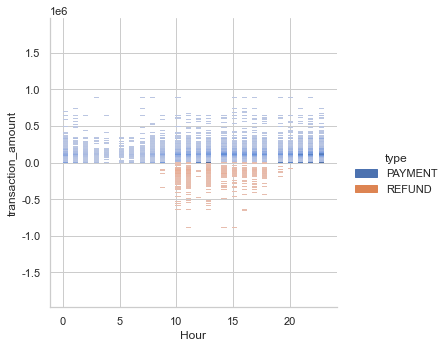

In [169]:
sns.displot(data = df, x = 'Hour', y = 'transaction_amount', hue = type_a)

### 요일별 매출 그래프

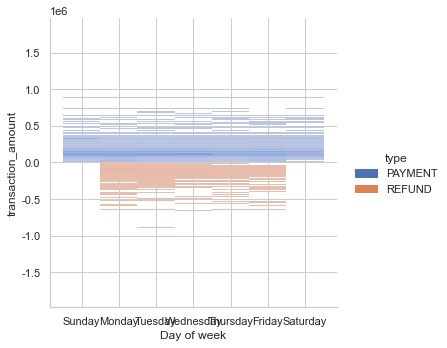

In [170]:
sns.displot(data = df, x = 'Day of week', y = 'transaction_amount', hue = type_a)

### 일별 매출 그래프

<AxesSubplot:xlabel='Day', ylabel='transaction_amount'>

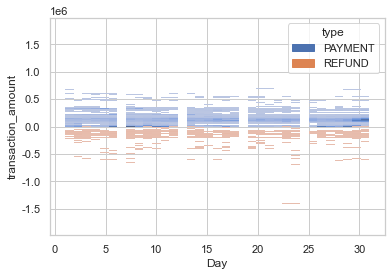

In [171]:
sns.histplot(data = df, x = 'Day', y = 'transaction_amount', hue = type_a)

### 주별 매출 그래프 , 수정필요(코드도)

<AxesSubplot:xlabel='Week', ylabel='transaction_amount'>

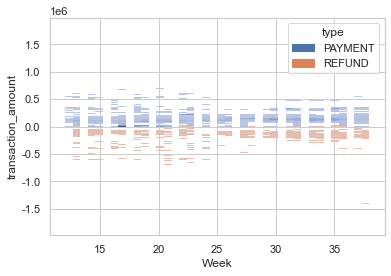

In [172]:
sns.histplot(data = df, x = 'Week', y = 'transaction_amount', hue = type_a)

### 월별 매출 그래프

<AxesSubplot:xlabel='Month', ylabel='transaction_amount'>

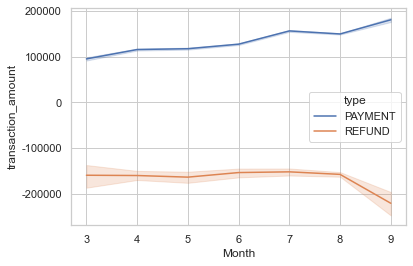

In [173]:
sns.lineplot(data = df, x = 'Month', y = 'transaction_amount', hue = type_a)

### 6개월(반기) 총매출 그래프

<AxesSubplot:ylabel='transaction_amount'>

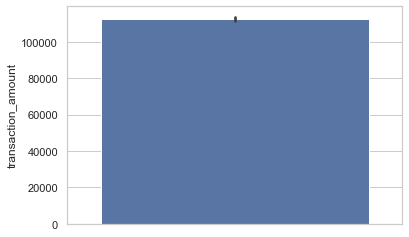

In [174]:
sns.barplot(data = sales, y = 'transaction_amount', hue = type_a)

# 강의 매출 분석

- course_title 별 transaction_amount 구해야 하는데 df DataFrame 에서 바로 하기 매출 합이 안맞음
> ['type'] column의 'ORDER'빼고 ['state'] column의 'COMPLETED' 만 필요

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101102 entries, 0 to 101101
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      101102 non-null  int64         
 1   customer_id             101102 non-null  int64         
 2   course_id               101102 non-null  int64         
 3   type                    101102 non-null  object        
 4   state                   101102 non-null  object        
 5   course_title            101102 non-null  object        
 6   category_title          101102 non-null  object        
 7   format                  101102 non-null  object        
 8   completed_at            101102 non-null  datetime64[ns]
 9   transaction_amount      101102 non-null  int64         
 10  coupon_title            101102 non-null  object        
 11  coupon_discount_amount  101102 non-null  int64         
 12  sale_price              101102

## 전체 강의 수

In [307]:
# 판매된 강의 종 수 
len(df.course_title.unique()), df.course_title.value_counts()

(610,
 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                            3252
 초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터                 2745
 초격차 패키지 : 한번에 끝내는 영상 촬영과 편집                            2526
 The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법                 2124
 올인원 패키지 : star741의 캐주얼 일러스트 드로잉                        1633
                                                        ... 
 프로모션 : 데이터 활용 능력을 바꿔 줄 데이터 분석 iPad 패키지 (7월 현물 프리패스)       1
 올인원 패키지 : 데이터기반 마케팅                                       1
 엑셀 온라인 완주반 3기                                             1
 스프링 아카데미아 강의 9 - 직접 적용해보는 TDD와 Spring Boot                1
 올인원 패키지 : Unity를 활용한 영화 애니메이션 제작                          1
 Name: course_title, Length: 610, dtype: int64)

## 전체 카테고리 수

In [306]:
# 판매된 카테고리 종 수 및 갯수
len(df.category_title.unique()), df.category_title.value_counts()

(13,
 프로그래밍      31916
 데이터사이언스    13832
 업무 생산성     13241
 디자인        11911
 영상/3D      10195
 마케팅         9774
 부동산/금융      5415
 투자/재테크      2472
 크리에이티브      2226
 지식콘텐츠         55
 비즈니스          40
 파이낸스          24
 일러스트           1
 Name: category_title, dtype: int64)

In [ ]:
# # sales 에 'course_title' column 추가
# c = df.loc[:, ['type', 'state', 'course_title', 'transaction_amount']]
# c_sales = s[(s['type'] != 'ORDER') & (s['state'] == 'COMPLETED')]
# c_sales.index = range(len(c_sales))
# c_sales

In [186]:
sales = df[(df['type'] != 'ORDER') + (df['type'] == 'REFUND') & (df['state'] == 'COMPLETED')]
sales.index = range(len(sales))
sales

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Day of week,Week
0,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,COMM,CARD,프로그래밍,2021-03-04,2021,3,28,15,Sunday,12
1,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,COMM,CARD,PPT/보고서,2019-11-14,2021,3,28,15,Sunday,12
2,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,COMM,CARD,영상 편집,2020-12-02,2021,3,28,15,Sunday,12
3,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,COMM,CARD,부동산/금융,2020-11-27,2021,3,28,15,Sunday,12
4,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,COMM,CARD,프론트엔드 개발,2021-02-02,2021,3,28,15,Sunday,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53035,1364969,669238,204286,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,...,INICIS,CARD,디자인툴,2021-04-23,2021,9,25,13,Saturday,38
53036,1364976,384003,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,...,KAKAO,CARD,영상 편집,2020-12-02,2021,9,25,13,Saturday,38
53037,1364991,670891,203935,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,...,INICIS,CARD,백엔드 개발,2021-05-31,2021,9,25,14,Saturday,38
53038,1364996,640697,205365,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,...,INICIS,VBANK,영상 편집,2021-06-15,2021,9,25,14,Saturday,38


## 가장 많은/적은 매출을 올린 강의 및 탑 10강의 매출추이

In [190]:
co_sale = sales.groupby('course_title').sum()
co_sale

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,Year,Month,Day,Hour,Week
course_title,,,,,,,,,,,
(test)프로모션 강의 페이지,3477662,435116,617388,10000,0,30000,6063,18,69,43,75
(초격차변경)프로모션 : 코딩테스트 결과를 바꾸는 전공생 코딩 BEST PASS (7월 프리패스),3596724,1694120,900000,1038000,0,1038000,6063,21,19,54,81
(테스트용) 프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 : 삼성노트북 플러스2),2261289,993016,600000,0,0,1980000,4042,12,19,27,46
(프로모션 7/16-7/29) 초격차 패키지 : 한 번에 끝내는 Spring 완.전.판,178112513,34990055,29673360,18749800,4938200,25776000,291024,1011,3256,2201,4190
:프로모션 : 콘텐츠 디자이너를 위한 커리어 백과사전 패키지 (9월 프리패스),1327377,552181,300000,880000,0,880000,2021,9,3,20,35
...,...,...,...,...,...,...,...,...,...,...,...
프론트엔드 개발자 되기 온라인 완주반 3기,23013092,7433922,4698095,7750500,1210000,14120000,46483,91,241,381,323
프론트엔드 개발자 되기 온라인 완주반 4기,42970500,16402098,8202320,15309000,1263000,23990000,80840,197,679,572,767
합격 패스 : ADsP,176925073,70734317,34845308,7391251,1623200,10148000,347612,712,3346,2586,2801


### 매출 상위 1~10위 까지의  강의  목록 

In [280]:
# c_high = course['transaction_amount'].sort_values(ascending=False)[:10]
co_sale_high = co_sale.sort_values(by='transaction_amount', ascending=False)[:10]
co_sale_high[['transaction_amount']]

,transaction_amount
course_title,
The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법,151049741
초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,141248845
올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,129821723
초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,116614335
초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,108576441
나의 칼퇴치트키 엑셀유치원,88201167
초격차 패키지 : 한번에 끝내는 디자인 툴,87700764
올인원 패키지 : star741의 캐주얼 일러스트 드로잉,84763815
올인원 패키지 : 완전정복 시각디자인 기초,82131657


### 매출 상위 1~10위 강의 매출 추이 그래프(6개월간)

각 상품별로 월별 판매금액
하나는 월별로 상품들 판매 매출을 보는게 있을거고
하나는 상품별로 각 월에 얼마씩 팔렸나 볼 수 있을거고

그럼 각 상품의 월별 합을 구해야되는데 그룹바이를 두번써야되나

In [351]:
co_m_sale = sales.groupby(['Month', 'course_title']).sum()
co_m_sale

id  customer_id  \
Month course_title                                                            
3     Java 웹 개발자 취업 온라인 완주반 2기                         2933736       833952   
      REC.ON : Autonomous Vehicle                       975178        40369   
      REC.ON : 틱톡(TikTok)                               973376        43518   
      THE RED : 광고인 박웅현과 크리에이티브                       64587927     21336375   
      The RED : 1조 기업 가치를 만들어 낸 경영 원칙 by 신현성           2939582       634710   
...                                                        ...          ...   
9     프로모션 : 프론트엔드 맥북 air 패스 (9월 현물 프리패스)              1357198       667525   
      프로모션 : 프론트엔드 맥북 pro 패스 (9월 현물 프리패스)              4072960      1267524   
      프로모션 : 한 번에 마스터하는 딥러닝 A to Z 벼락치기 패키지(9월 프리패스)   2655409       727206   
      합격 패스 : 데이터베이스와 SQLD                            45608115     18140671   
      합격 패스 : 정보처리기사 필기&실기                            76305201     29047870   

                                                      course_id  \
Month course_title                                                
3     Java 웹 개발자 취업 온라인 완주반 2기                           612741   
      REC.ON : Autonomous Vehicle                        203004   
      REC.ON : 틱톡(TikTok)                                202677   
      THE RED : 광고인 박웅현과 크리에이티브                        13485450   
      The RED : 1조 기업 가치를 만들어 낸 경영 원칙 by 신현성             609708   
...                                                         ...   
9     프로모션 : 프론트엔드 맥북 air 패스 (9월 현물 프리패스)                300000   
      프로모션 : 프론트엔드 맥북 pro 패스 (9월 현물 프리패스)                900000   
      프로모션 : 한 번에 마스터하는 딥러닝 A to Z 벼락치기 패키지(9월 프리패스)     600000   
      합격 패스 : 데이터베이스와 SQLD                              6891732   
      합격 패스 : 정보처리기사 필기&실기                             11486526   

                                                      transaction_amount  \
Month course_title                                                         
3     Java 웹 개발자 취업 온라인 완주반 2기                                   1697000   
      REC.ON : Autonomous Vehicle                                   8000   
      REC.ON : 틱톡(TikTok)                                           2500   
      THE RED : 광고인 박웅현과 크리에이티브                                  3894000   
      The RED : 1조 기업 가치를 만들어 낸 경영 원칙 by 신현성                      492000   
...                                                                  ...   
9     프로모션 : 프론트엔드 맥북 air 패스 (9월 현물 프리패스)                        1400000   
      프로모션 : 프론트엔드 맥북 pro 패스 (9월 현물 프리패스)                        5400000   
      프로모션 : 한 번에 마스터하는 딥러닝 A to Z 벼락치기 패키지(9월 프리패스)              660000   
      합격 패스 : 데이터베이스와 SQLD                                       1864600   
      합격 패스 : 정보처리기사 필기&실기                                        339500   

                                                      coupon_discount_amount  \
Month course_title                                                             
3     Java 웹 개발자 취업 온라인 완주반 2기                                        100000   
      REC.ON : Autonomous Vehicle                                     119500   
      REC.ON : 틱톡(TikTok)                                              89000   
      THE RED : 광고인 박웅현과 크리에이티브                                            0   
      The RED : 1조 기업 가치를 만들어 낸 경영 원칙 by 신현성                               0   
...                                                                      ...   
9     프로모션 : 프론트엔드 맥북 air 패스 (9월 현물 프리패스)                                  0   
      프로모션 : 프론트엔드 맥북 pro 패스 (9월 현물 프리패스)                                  0   
      프로모션 : 한 번에 마스터하는 딥러닝 A to Z 벼락치기 패키지(9월 프리패스)                       0   
      합격 패스 : 데이터베이스와 SQLD                                            726900   
      합격 패스 : 정보처리기사 필기&실기                                            195000   

                                                      sale_price    Year  \
Month course_title                                    

In [352]:
# 전체에서 가장 큰 값순
co_m_sale_high = co_m_sale.sort_values(by='transaction_amount', ascending=False)[:10]
co_m_sale_high[['transaction_amount']]

transaction_amount
Month course_title                                                     
8     올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략            61433390
6     The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법                   56252000
7     The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법                   54446287
      나의 칼퇴치트키 엑셀유치원                                           48572000
      올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략            48516300
8     용호수의 돈 버는 실전 영상 제작                                       42131000
      나의 칼퇴치트키 엑셀유치원                                           31668667
      The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법                   30131220
4     초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                              29567617
5     초격차 패키지 : 한 번에 끝내는 프론트엔드 개발                              29258749

In [345]:
co_m_sale.index[2:][0]

(3, 'REC.ON : 틱톡(TikTok)')

음.. 강좌별로 월별로 하려는건 알았는데.. 왜?
A 강좌가 3월 4건, 4월 2건 이면 3월에 얼마, 4월에 얼마인지 알아야되니

In [314]:
co_sales = sales.groupby(['course_title','Month'])[]
co_sales

<AxesSubplot:xlabel='transaction_amount', ylabel='Month'>

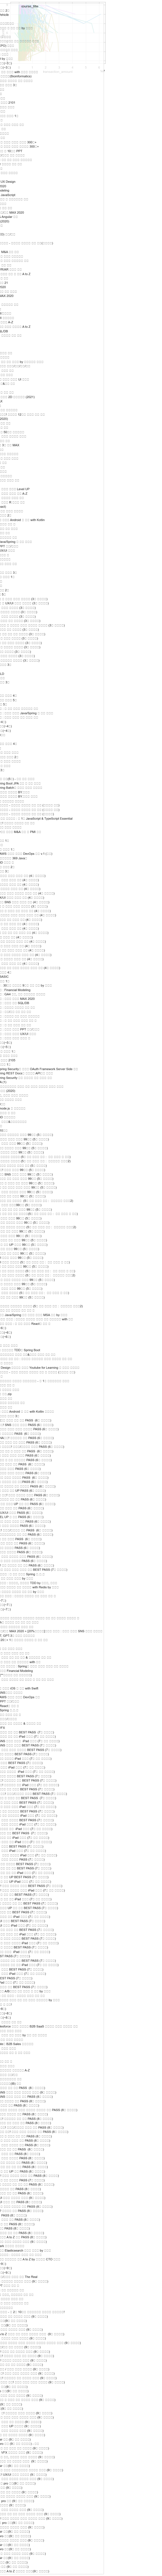

In [377]:
# 망함
sns.lineplot(data = co_m_sale, x = 'transaction_amount', y = 'Month', hue = 'course_title')

### 매출 하위 1~10위 강의목록

In [192]:
co_sale_row = co_sale.sort_values(by='transaction_amount')[:10]
co_sale_row[['transaction_amount']]

,transaction_amount
course_title,
프로모션 : 디자인 맥북 air 패스(9월 현물 프리패스),-1400000
프로모션 : 기초부터 시작하는 데이터분석 프리패스 (5월 삼성 패키지 현물 : 삼성 갤럭시 북 프로),-1399000
모션그래픽 포트폴리오 온라인 완주반 1기,-1144000
코딩+알고리즘 온라인 완주반 5기,-810000
디지털 마케팅 온라인 완주반 3기,-575000
매주)브런치로 책 출판 온라인 완주반,-520000
매주)컴퓨터 공학 전공자 따라잡기 온라인 완주반,-380000
브런치로 책 출판 온라인 완주반 3기,-360000
건축/공간 디자인 실무 완성 온라인 완주반 1기,-334800


### 매출 하위 1~10위 강의 매출 추이 그래프(6개월간)

## 가장 많은/적은 매출을 올린 카테고리 탑 10카테고리 매출추이

In [353]:
ca_sale = sales.groupby('category_title').sum()
ca_sale

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,Year,Month,Day,Hour,Week
category_title,,,,,,,,,,,
데이터사이언스,8242293733,2650941975,1505426745,950073852,173986700,1306113823,14405688,43127,126782,105720,173594
디자인,7199519948,2837298870,1241709653,663196168,144120380,943694100,12279596,39177,111518,89939,159005
마케팅,5804389362,2211927967,1040230401,587623324,86913550,831966100,10096916,30574,90530,73585,123437
부동산/금융,3417711609,1209073813,602150540,471074334,63795775,590777000,5887173,18302,53320,43631,74128
비즈니스,28878664,9988972,6428081,5029865,3735,6353600,46483,182,99,304,700
업무 생산성,7912807651,2988740212,1423293439,572358665,100062310,755127700,13924690,41110,116669,100774,164110
영상/3D,6465442186,2558588419,1115242624,544706205,125905300,764268900,11016471,35212,100869,79959,143110
지식콘텐츠,25624998,5911755,4502432,4969000,229000,5198000,44462,140,277,333,547
크리에이티브,1039848112,394933932,242717863,240873160,9773200,322574958,1887614,5251,11204,13914,20126


### 매출 상위 1~10위 까지의  카테고리  목록

In [354]:
ca_sale_high = ca_sale.sort_values(by='transaction_amount', ascending=False)[:10]
ca_sale_high[['transaction_amount']]

,transaction_amount
category_title,
프로그래밍,1650488541
데이터사이언스,950073852
디자인,663196168
마케팅,587623324
업무 생산성,572358665
영상/3D,544706205
부동산/금융,471074334
투자/재테크,277706420
크리에이티브,240873160


### 매출 상위 1~10위 카테고리 매출 추이 그래프(6개월간)

월별로

묶이면 얘네도 묶여야되는데 그게 안되잖아 묶인만큼 다른 열들도 줄어야되는데 안줄지 그러니까 합쳐주든 뭐하든 해야지
그럼 묶인걸 주르륵 나오게 하려면 어떻게 해야되? 가나다순?
그치 그룹이 아니라 월로 할꺼니까 월별로 내림차순하고, 그다음에 이름으로 오름을 하던 내림을 해야지
그럼 어디보자

In [370]:
sales.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Day of week,Week
0,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,COMM,CARD,프로그래밍,2021-03-04,2021,3,28,15,Sunday,12
1,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,...,COMM,CARD,PPT/보고서,2019-11-14,2021,3,28,15,Sunday,12
2,970669,478033,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:26:47,96000,...,COMM,CARD,영상 편집,2020-12-02,2021,3,28,15,Sunday,12
3,970671,469860,203644,PAYMENT,COMPLETED,올인원 패키지 : 권오상의 금융 아카데미 - 권오상의 재무제표 분석 기초(평생소장),부동산/금융,올인원,2021-03-28 15:27:17,263000,...,COMM,CARD,부동산/금융,2020-11-27,2021,3,28,15,Sunday,12
4,970676,478035,203720,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-03-28 15:31:01,91000,...,COMM,CARD,프론트엔드 개발,2021-02-02,2021,3,28,15,Sunday,12


In [373]:
a = sales.sort_values(by = 'Month')
a.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Day of week,Week
0,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,...,COMM,CARD,프로그래밍,2021-03-04,2021,3,28,15,Sunday,12
1540,979917,468846,202614,PAYMENT,COMPLETED,올인원 패키지 : 컴퓨터비전과 딥러닝,데이터사이언스,올인원,2021-03-31 11:14:09,139500,...,COMM,CARD,딥러닝/인공지능,2020-05-20,2021,3,31,11,Wednesday,13
1541,979740,481580,202883,PAYMENT,COMPLETED,올인원 패키지 : 디지털 마케팅 MAX 2020,마케팅,올인원,2021-03-31 11:16:54,114500,...,COMM,VBANK,디지털마케팅,2018-11-11,2021,3,31,11,Wednesday,13
1542,979926,481553,203178,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-31 11:17:05,96000,...,COMM,CARD,영상 편집,2020-12-02,2021,3,31,11,Wednesday,13
1543,979933,480357,201083,PAYMENT,COMPLETED,올인원 패키지 : 딥러닝/인공지능,데이터사이언스,올인원,2021-03-31 11:18:05,139000,...,COMM,CARD,딥러닝/인공지능,2019-07-04,2021,3,31,11,Wednesday,13


In [374]:
b = sales.sort_values(by = ['Month', 'course_title'])
b.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Day of week,Week
510,973587,54591,204247,PAYMENT,COMPLETED,Java 웹 개발자 취업 온라인 완주반 2기,프로그래밍,온라인 완주반,2021-03-29 14:12:33,599000,...,COMM,CARD,프로그래밍,2018-11-11,2021,3,29,14,Monday,13
1280,978272,287701,204247,PAYMENT,COMPLETED,Java 웹 개발자 취업 온라인 완주반 2기,프로그래밍,온라인 완주반,2021-03-30 21:10:38,549000,...,COMM,VBANK,프로그래밍,2018-11-11,2021,3,30,21,Tuesday,13
1912,981877,491660,204247,PAYMENT,COMPLETED,Java 웹 개발자 취업 온라인 완주반 2기,프로그래밍,온라인 완주반,2021-03-31 18:28:04,549000,...,COMM,CARD,프로그래밍,2018-11-11,2021,3,31,18,Wednesday,13
768,975178,40369,203004,PAYMENT,COMPLETED,REC.ON : Autonomous Vehicle,데이터사이언스,올인원,2021-03-29 21:59:25,8000,...,COMM,CARD,딥러닝/인공지능,2020-08-25,2021,3,29,21,Monday,13
464,973376,43518,202677,PAYMENT,COMPLETED,REC.ON : 틱톡(TikTok),마케팅,올인원,2021-03-29 13:13:27,2500,...,COMM,CARD,SNS마케팅,2020-07-24,2021,3,29,13,Monday,13


In [376]:
c = sales.sort_values(by = ['Month', 'course_title', 'transaction_amount'])
c.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Day of week,Week
1280,978272,287701,204247,PAYMENT,COMPLETED,Java 웹 개발자 취업 온라인 완주반 2기,프로그래밍,온라인 완주반,2021-03-30 21:10:38,549000,...,COMM,VBANK,프로그래밍,2018-11-11,2021,3,30,21,Tuesday,13
1912,981877,491660,204247,PAYMENT,COMPLETED,Java 웹 개발자 취업 온라인 완주반 2기,프로그래밍,온라인 완주반,2021-03-31 18:28:04,549000,...,COMM,CARD,프로그래밍,2018-11-11,2021,3,31,18,Wednesday,13
510,973587,54591,204247,PAYMENT,COMPLETED,Java 웹 개발자 취업 온라인 완주반 2기,프로그래밍,온라인 완주반,2021-03-29 14:12:33,599000,...,COMM,CARD,프로그래밍,2018-11-11,2021,3,29,14,Monday,13
768,975178,40369,203004,PAYMENT,COMPLETED,REC.ON : Autonomous Vehicle,데이터사이언스,올인원,2021-03-29 21:59:25,8000,...,COMM,CARD,딥러닝/인공지능,2020-08-25,2021,3,29,21,Monday,13
464,973376,43518,202677,PAYMENT,COMPLETED,REC.ON : 틱톡(TikTok),마케팅,올인원,2021-03-29 13:13:27,2500,...,COMM,CARD,SNS마케팅,2020-07-24,2021,3,29,13,Monday,13


In [368]:
a = sales.sort_values(by = ['Month', 'course_title', 'transaction_amount'])
a.index = range(len(a))
a

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,...,pg,method,subcategory_title,marketing_start_at,Year,Month,Day,Hour,Day of week,Week
0,978272,287701,204247,PAYMENT,COMPLETED,Java 웹 개발자 취업 온라인 완주반 2기,프로그래밍,온라인 완주반,2021-03-30 21:10:38,549000,...,COMM,VBANK,프로그래밍,2018-11-11,2021,3,30,21,Tuesday,13
1,981877,491660,204247,PAYMENT,COMPLETED,Java 웹 개발자 취업 온라인 완주반 2기,프로그래밍,온라인 완주반,2021-03-31 18:28:04,549000,...,COMM,CARD,프로그래밍,2018-11-11,2021,3,31,18,Wednesday,13
2,973587,54591,204247,PAYMENT,COMPLETED,Java 웹 개발자 취업 온라인 완주반 2기,프로그래밍,온라인 완주반,2021-03-29 14:12:33,599000,...,COMM,CARD,프로그래밍,2018-11-11,2021,3,29,14,Monday,13
3,975178,40369,203004,PAYMENT,COMPLETED,REC.ON : Autonomous Vehicle,데이터사이언스,올인원,2021-03-29 21:59:25,8000,...,COMM,CARD,딥러닝/인공지능,2020-08-25,2021,3,29,21,Monday,13
4,973376,43518,202677,PAYMENT,COMPLETED,REC.ON : 틱톡(TikTok),마케팅,올인원,2021-03-29 13:13:27,2500,...,COMM,CARD,SNS마케팅,2020-07-24,2021,3,29,13,Monday,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53035,1346571,516254,201518,PAYMENT,COMPLETED,합격 패스 : 정보처리기사 필기&실기,프로그래밍,올인원,2021-09-14 20:49:32,10400,...,KAKAO,POINT,개발자 커리어,2018-11-11,2021,9,14,20,Tuesday,37
53036,1347344,501996,201518,PAYMENT,COMPLETED,합격 패스 : 정보처리기사 필기&실기,프로그래밍,올인원,2021-09-15 11:43:28,10400,...,NAVER,POINT,개발자 커리어,2018-11-11,2021,9,15,11,Wednesday,37
53037,1352242,656595,201518,PAYMENT,COMPLETED,합격 패스 : 정보처리기사 필기&실기,프로그래밍,올인원,2021-09-17 14:37:49,10400,...,COMM,TRANS,개발자 커리어,2018-11-11,2021,9,17,14,Friday,37
53038,1352191,659704,201518,PAYMENT,COMPLETED,합격 패스 : 정보처리기사 필기&실기,프로그래밍,올인원,2021-09-17 15:32:30,10400,...,NAVER,CARD,개발자 커리어,2018-11-11,2021,9,17,15,Friday,37


### 매출 하위 1~10위 카테고리목록

In [355]:
ca_sale_high = ca_sale.sort_values(by='transaction_amount')[:10]
ca_sale_high[['transaction_amount']]

,transaction_amount
category_title,
파이낸스,4620000
지식콘텐츠,4969000
비즈니스,5029865
크리에이티브,240873160
투자/재테크,277706420
부동산/금융,471074334
영상/3D,544706205
업무 생산성,572358665
마케팅,587623324


### 매출 하위 1~10위 카테고리 매출 추이 그래프(6개월간)

# 수강 신청 행동 패턴 분석

와.. 감이 안오네... 
cancelled 를 정의하고 가야되는데... 우선 음.. cancelled를 행동의 취소.. 보다 이탈
수강신청 페이지까지 갔다가 이탈 그럼 행동구분이
1. 수강신청 갔다가 이탈,
2. 수강신청 갔다가 구매,
3. 수강신청 갔다가 구매, 환불

## cancelled 가장 많은 강좌(구매가 많은게 환불이 많은가? 주의)

### 취소가 많은  1~20위 까지의  강의  목록(cancelled)

### 취소가 가장 적은 1~20위 강의 목록

### 환불이 많은  1~20위 까지의  강의  목록(refund)

### 환불률이 가장 적은 1~20위 강의 목록

### 구매률과 환불률의 상관관계

# PG사 목록

## 기존 PG사 vs 신규 pg사 점유율 현황

### 기존 PG사 vs 신규 pg사 기간별 점유율 변동 변화추이

# VIP그룹 분석

## VIP 그룹 정의

## 일반 고객 평균 결제 횟수 vs VIP 고객 평균 결제 횟수

## VIP 그룹 특징

# 쿠폰 사용 분석

## 전체구매건 중 쿠폰사용한 구매비율

## 매출에 대한 쿠폰의 중요도 분석

# 패키지 강의 vs 단품 강의

# 레드는 과연 성공했는가?